In [18]:
import pprint
import sys
import numpy as np
import matplotlib.pyplot as plt
import random 
import math
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

In [19]:
a=pd.read_csv('train_data.csv')
a.describe()

df = pd.DataFrame(a)

In [20]:
# train, validate = np.split(df, [int(.8*len(df))]) #for sequential data
train, validate = np.split(df.sample(frac=1), [int(.8*len(df))]) # for random 

In [21]:
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df['left'].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/float(len(df[Class]))
        entropy += -fraction*np.log2(fraction+eps)
    return entropy


In [22]:
def min_num_entropy(attribute):
    temp_d=df    
    x=temp_d.sort_values(by=attribute)
#     print "min_continuous entropy"
    variables = x[attribute].unique()
  
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    entropy2 = 0
    entropy1 = 0
    min_entr=sys.maxint
    min_split=sys.maxint
    entropy_fin=0
    for variable in variables:
        entropy = 0
        df1 = df[df[attribute]<=variable]
        df2 = df[df[attribute]>variable]
        entropy1 = find_entropy(df1)
        entropy2 = find_entropy(df2)

        
        fraction2 = len(df2)/float(len(df))
        fraction1 = len(df1)/float(len(df))
        entropy_fin = fraction1*entropy1+ fraction2*entropy2
        
        if min_entr>entropy_fin:
            min_entr=entropy_fin
            min_split=variable

    return abs(min_entr),min_split
 
    
# print min_num_entropy('satisfaction_level')    

In [23]:
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/float(len(df))
        entropy2 += fraction2*entropy
    return abs(entropy2)



In [24]:
def max_IG(dataf):    
    IG = []
    i=0
    split=-1
    max_=0
    max_in=''
    #categ
    for key in dataf.keys()[5:-1]:
        temp_en = find_entropy_attribute(dataf,key) 
        ig1= find_entropy(dataf)-temp_en      
#         print("IG 1: ",ig1,key,key)        
        if ig1>max_:
            max_=ig1
            max_in=key
        IG.append(ig1)

    #continuous
    for key in dataf.keys()[0:5]:
        temp_en = min_num_entropy(key)[0]
        ig1=find_entropy(dataf)-temp_en    
#         print("IG 2conti: ",ig1,key)        
        if ig1>max_:
            max_=ig1
            max_in=key
            split=min_num_entropy(key)[1]      

        IG.append(ig1)
#     print 'ig=',IG
    return max_in,max_,split,IG

a,b,c,d=max_IG(train)


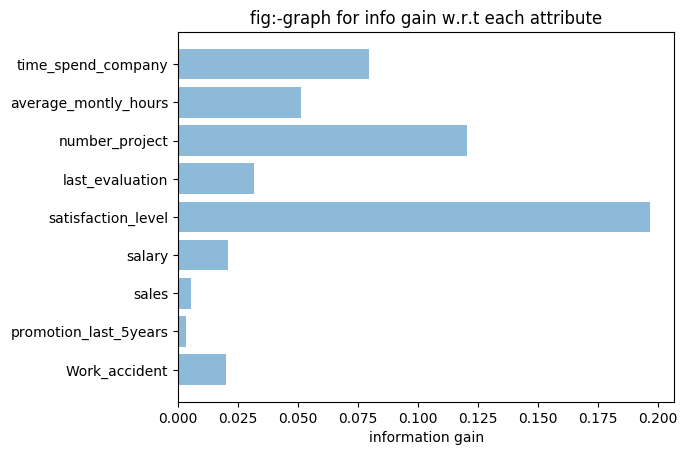

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
xx=[]

for i in df.keys()[5:-1]:
    xx.append(i)
for i in df.keys()[0:5]:
    xx.append(i)
#     print(i)
# print numerical_attributes

a,b,c,d=max_IG(train)

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(xx))
# performance = [10,8,6,4,2,1]
 
plt.barh(y_pos, d, align='center', alpha=0.5)
plt.yticks(y_pos, xx)
plt.xlabel('information gain')
plt.title('fig:-graph for info gain w.r.t each attribute')
 
plt.show()

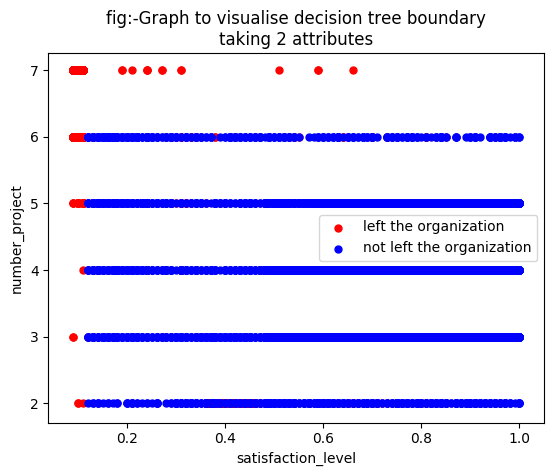

In [26]:
x1=[]
y1=[]
x2=[]
y2=[]
i=0
while i< len(df):
    if df.iloc[i]['left']==1:
        x1.append(df.iloc[i]['satisfaction_level'])
        y1.append(df.iloc[i]['number_project'])
    else:
        x2.append(df.iloc[i]['satisfaction_level'])
        y2.append(df.iloc[i]['number_project'])
    i=i+1

plt.scatter(x1,y1, label='left the organization', color='red', s=25, marker="o")
plt.scatter(x2,y2, label='not left the organization', color='blue', s=25, marker="o")
plt.xlabel('satisfaction_level')
plt.ylabel('number_project')
plt.title('fig:-Graph to visualise decision tree boundary\ntaking 2 attributes')
plt.legend()

plt.savefig('q_4.png')
plt.show()